In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = 'Processed_Poem_Dataset.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Encode labels
label_encoder = LabelEncoder()
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])

# Split data into training and a temporary set (test+validation)
X_train, X_temp, y_train, y_temp = train_test_split(
    data['content'], 
    data['Category_encoded'], 
    test_size=0.2,  # 20% for test+validation
    random_state=42
)

# Ensure the temporary set is further split into test and validation sets
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, 
    y_temp, 
    test_size=0.5,  # 50% of the temporary set becomes validation
    random_state=42
)

# Print dataset sizes
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Validation samples: {len(X_val)}")

# Combine features and labels into DataFrames
train_data = pd.DataFrame({'content': X_train, 'Category_encoded': y_train})
test_data = pd.DataFrame({'content': X_test, 'Category_encoded': y_test})
val_data = pd.DataFrame({'content': X_val, 'Category_encoded': y_val})

# Save splits
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)

print("Train, test, and validation datasets saved as CSV files!")


Training samples: 1920
Testing samples: 240
Validation samples: 240
Train, test, and validation datasets saved as CSV files!


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features
tfidf = TfidfVectorizer(max_features=2500)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF training data shape: {X_train_tfidf.shape}")


TF-IDF training data shape: (1920, 2500)


In [23]:
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_tfidf, y_train)

print("SVM model training complete.")


SVM model training complete.


Classification Report:
                 precision    recall  f1-score   support

   Thơ gia đình       0.90      0.78      0.83        67
Thơ thiên nhiên       0.68      0.72      0.70        64
       Thơ tình       0.62      0.65      0.64        52
   Thơ đất nước       0.76      0.79      0.78        57

       accuracy                           0.74       240
      macro avg       0.74      0.73      0.74       240
   weighted avg       0.75      0.74      0.74       240

Accuracy: 0.7375


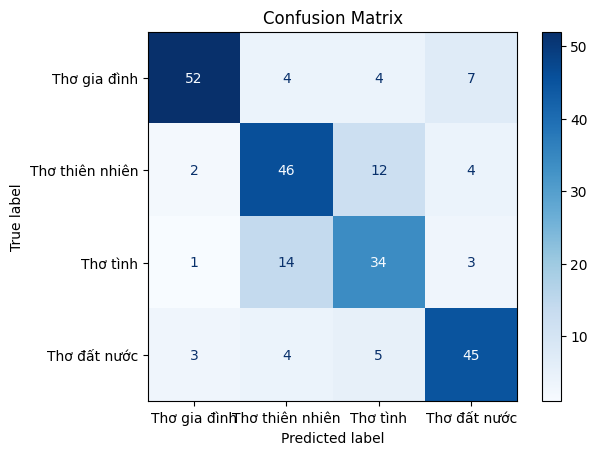

In [24]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)  # Customize the color map if needed
plt.title("Confusion Matrix")
plt.show()



In [35]:
import joblib

# Save the model, label encoder, and TF-IDF vectorizer
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Model, label encoder, and TF-IDF vectorizer saved.")


Model, label encoder, and TF-IDF vectorizer saved.
